In [1]:
# Task 1: Load a CSV Dataset
# Description: Load a CSV file into a Pandas DataFrame and print the first five rows to understand the structure of the dataset.

import pandas as pd
import numpy as np




In [2]:
# Task 2: Check for Missing Values
# Description: Identify and list the columns with missing values and the number of missing values in each.
from io import StringIO

# Sample data (use your actual data here)
data = """
Name,Age,Department,Salary
Alice,25,HR,50000
Bob,30,IT,60000
Charlie,,Finance,70000
Bob,30,IT,60000
Eve,22,HR,
"""

df = pd.read_csv(StringIO(data))
df



,Name,Age,Department,Salary
0,Alice,25.0,HR,50000.0
1,Bob,30.0,IT,60000.0
2,Charlie,NaN,Finance,70000.0
3,Bob,30.0,IT,60000.0
4,Eve,22.0,HR,NaN


In [3]:
# Task 3: Visualize Missing Data
# Description: Use a heatmap to visualize the missing values in the dataset.
print("Dataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe(include='all'))





Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        5 non-null      object 
 1   Age         4 non-null      float64
 2   Department  5 non-null      object 
 3   Salary      4 non-null      float64
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes

Summary Statistics:
       Name        Age Department        Salary
count     5   4.000000          5      4.000000
unique    4        NaN          3           NaN
top     Bob        NaN         HR           NaN
freq      2        NaN          2           NaN
mean    NaN  26.750000        NaN  60000.000000
std     NaN   3.947573        NaN   8164.965809
min     NaN  22.000000        NaN  50000.000000
25%     NaN  24.250000        NaN  57500.000000
50%     NaN  27.500000        NaN  60000.000000
75%     NaN  30.000000        NaN  62500.000000
max     NaN  30.000000        NaN 

In [4]:
# Task 4: Remove Columns with Many Missing Values
# Description: Drop columns that have more than 50% missing values.

print("Missing Values per Column:")
print(df.isnull().sum())

print("\nPercentage of Missing Values:")
print((df.isnull().mean() * 100).round(2))



Missing Values per Column:
Name          0
Age           1
Department    0
Salary        1
dtype: int64

Percentage of Missing Values:
Name           0.0
Age           20.0
Department     0.0
Salary        20.0
dtype: float64


In [5]:
# Task 5: Identify Duplicate Rows
# Description: Check for and display any duplicate rows in the dataset.

print("Number of Duplicate Rows:", df.duplicated().sum())

# Show duplicates
df[df.duplicated()]



Number of Duplicate Rows: 1


,Name,Age,Department,Salary
3,Bob,30.0,IT,60000.0


In [6]:
# Task 6: Remove Duplicate Rows
# Description: Remove duplicate rows from the dataset and verify that they have been removed.

# Normalize Department column
df['Department'] = df['Department'].str.strip().str.title()

print("Unique Departments:")
print(df['Department'].unique())



Unique Departments:
['Hr' 'It' 'Finance']


In [7]:
# Task 7: Check Data Inconsistencies
# Description: Identify inconsistencies in categorical columns, such as differing text cases or trailing spaces.

# Check data types
print(df.dtypes)

# Check valid range for age
print("Invalid Age values:")
print(df[(df['Age'] < 18) | (df['Age'] > 65)])



Name           object
Age           float64
Department     object
Salary        float64
dtype: object
Invalid Age values:
Empty DataFrame
Columns: [Name, Age, Department, Salary]
Index: []


In [8]:
# Task 8: Get Summary of Data Quality
# Description: Generate a summary of data quality including total records, number of duplicate rows, and columns with missing values.


quality_report = pd.DataFrame({
    "DataType": df.dtypes,
    "MissingValues": df.isnull().sum(),
    "Missing(%)": (df.isnull().mean() * 100).round(2),
    "UniqueValues": df.nunique(),
    "Duplicates": df.duplicated().sum()
})

quality_report


,DataType,MissingValues,Missing(%),UniqueValues,Duplicates
Name,object,0,0.0,4,1
Age,float64,1,20.0,3,1
Department,object,0,0.0,3,1
Salary,float64,1,20.0,3,1


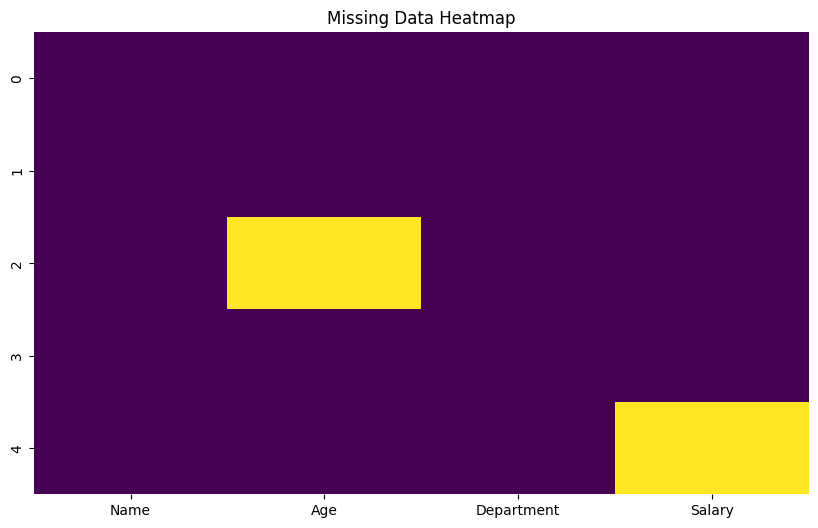

Missing Values Summary:
        Missing Values  Percentage
Age                  1        20.0
Salary               1        20.0

Numerical Statistics:
             Age        Salary
count   4.000000      4.000000
mean   26.750000  60000.000000
std     3.947573   8164.965809
min    22.000000  50000.000000
25%    24.250000  57500.000000
50%    27.500000  60000.000000
75%    30.000000  62500.000000
max    30.000000  70000.000000

Categorical Distribution:

Name Distribution:
Name
Bob        0.4
Alice      0.2
Charlie    0.2
Eve        0.2
Name: proportion, dtype: float64

Department Distribution:
Department
Hr         0.4
It         0.4
Finance    0.2
Name: proportion, dtype: float64

--- Missing Values Summary ---
        Missing Values  Percentage
Age                  1        20.0
Salary               1        20.0



--- Numerical Statistics ---
             Age        Salary
count   4.000000      4.000000
mean   26.750000  60000.000000
std     3.947573   8164.965809
min    22.000000

In [9]:
# Task 9: Generate a Data Quality Report
# Description: Create a comprehensive data quality report that includes not only missing values but also basic statistics for numerical columns and the distribution of categorical columns.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Example: df = pd.read_csv('your_data.csv')

# Step 1: Checking Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Filter columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Display missing data summary
print("Missing Values Summary:")
print(missing_data)

# Step 2: Basic Statistics for Numerical Columns
numerical_stats = df.describe()

# Display basic statistics for numerical columns
print("\nNumerical Statistics:")
print(numerical_stats)

# Step 3: Distribution of Categorical Columns
categorical_columns = df.select_dtypes(include='object').columns
categorical_distribution = {}

for column in categorical_columns:
    categorical_distribution[column] = df[column].value_counts(normalize=True)

# Display distribution for each categorical column
print("\nCategorical Distribution:")
for column, distribution in categorical_distribution.items():
    print(f"\n{column} Distribution:")
    print(distribution)

# Compile the full report
report = {
    "Missing Values Summary": missing_data,
    "Numerical Statistics": numerical_stats,
    "Categorical Distribution": categorical_distribution
}

# To display the full report in a clean format
for key, value in report.items():
    print(f"\n--- {key} ---")
    print(value)
    print("\n")



In [11]:
# Task 10: Advanced Data Imputation
# Description: Perform advanced data imputation by replacing missing values in numerical columns with the mean and categorical columns with the mode.

import pandas as pd

# Assuming 'df' is your DataFrame
# Example: df = pd.read_csv('your_data.csv')

# Step 1: Impute Missing Values for Numerical Columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    mean_value = df[col].mean()  # Calculate the mean of the column
    df[col].fillna(mean_value, inplace=True)  # Impute missing values with the mean

# Step 2: Impute Missing Values for Categorical Columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Calculate the mode (most frequent value) of the column
    df[col].fillna(mode_value, inplace=True)  # Impute missing values with the mode

# Display the DataFrame after imputation
print("Data after imputation:")
print(df.head())  # Display the first few rows of the updated DataFrame




Data after imputation:
      Name    Age Department   Salary
0    Alice  25.00         Hr  50000.0
1      Bob  30.00         It  60000.0
2  Charlie  26.75    Finance  70000.0
3      Bob  30.00         It  60000.0
4      Eve  22.00         Hr  60000.0
